In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
%matplotlib inline

In [40]:
huc8=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp')
huc8= huc8.to_crs({'init': 'epsg:3732'})
huc8['area']=huc8.area

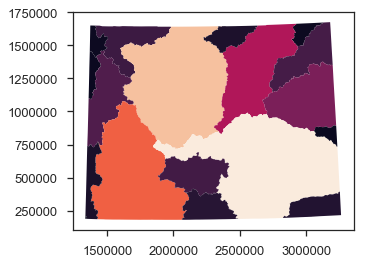

In [119]:
huc8.plot(column='Shape_Area')

In [124]:
df= pd.read_csv(r'M:/critical/imputed.csv')

In [129]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geometry)

geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')
projGeoDF=geo_df.to_crs(crs)

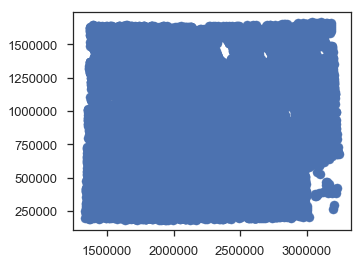

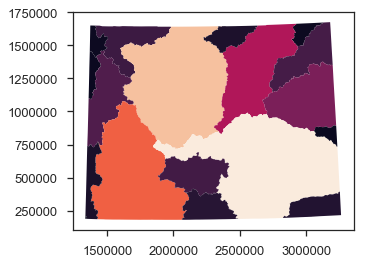

In [132]:
projGeoDF.plot()
huc8.plot(column='Shape_Area')

In [133]:
points_with_basin=gpd.sjoin(projGeoDF, huc8, how='inner', op='intersects')

In [139]:
points_with_basin.columns

Index(['Unnamed: 0', 'u_dn_ppm', 'u_fl_ppm', 'ag_ppm', 'al_pct', 'as_ppm',
       'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_pct', 'cd_ppm',
       'ce_ppm', 'cl_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm',
       'eu_ppm', 'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm', 'sm_ppm', 'sn_ppm',
       'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm', 'ti_ppm', 'v_ppm', 'w_ppm',
       'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm', 'longitude', 'latitude',
       'geometry', 'index_right', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME',
       'HUC_6', 'Shape_Leng', 'Shape_Area', 'area'],
      dtype='object')

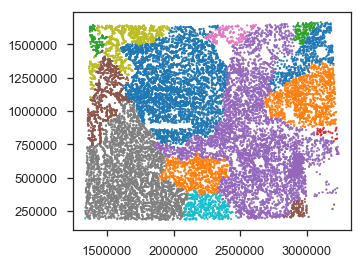

In [141]:
points_with_basin.plot('HU_6_NAME', s=3)

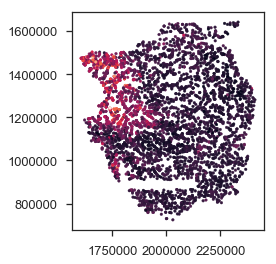

In [150]:
points_with_basin[points_with_basin['HU_6_NAME']=='Big Horn'].plot('co_ppm', s=7)

In [3]:
bedrock=gpd.read_file(r'J:\Geology\WSGS\GIS\bedrock.shp')
bedrock= bedrock.to_crs({'init': 'epsg:3732'})

In [4]:
test0=gpd.overlay(bedrock.iloc[1:],huc8.loc[1:], how='intersection')
test0['area'] = test0.area
test0.to_csv('J:/Geology/WSGS/intersection.csv')

In [5]:
test1=test0.groupby(['HU_6_NAME','Unit_Name']).sum()['area'].unstack(level=0)

In [6]:
basinNames=test1.columns

In [7]:
for i in range(len(basinNames)):
    test1[basinNames[i]+' percentage']=100*(test1[basinNames[i]]/huc8[huc8['HU_6_NAME']==basinNames[i]]['area'].values).values

In [8]:
test1.fillna(0).to_csv('J:/Geology/WSGS/basin_area_formation.csv')

In [44]:
huc8['Shape_Area'].sum()

27.970384087961911

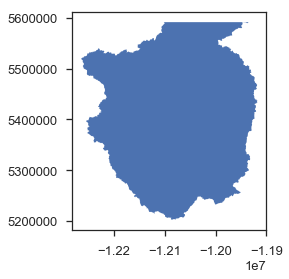

In [38]:
huc8[huc8['HU_6_NAME']=='Big Horn'].plot()

In [232]:
basinFormations=pd.read_csv('J:/Geology/WSGS/basin_area_formation2.csv', index_col='Unit_Name')

In [241]:
rotated=basinFormations.transpose()
rotated['HU_6_NAME']=rotated.index

In [243]:
merged=points_with_basin.merge(rotated, on='HU_6_NAME')

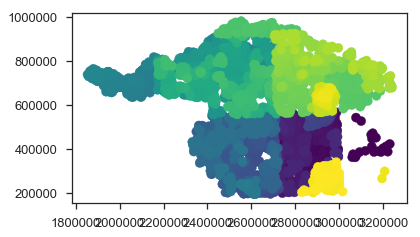

In [278]:
merged[merged['White River Formation']>5].geometry.plot(cmap='viridis')


In [285]:
cleaned=merged.iloc[0:,:-4]

In [287]:
cleaned.to_csv('J:/Geology/WSGS/hu_6_formations_points.csv')

In [289]:
bedrock.columns

Index(['Symbol_Ori', 'Unit_Name', 'Unit_Descr', 'Unit_Age', 'Symbol',
       'RuleID_1', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')